<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/main/Muyoung_part_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#normalization
from sklearn.preprocessing import StandardScaler

#splitting and feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

#evaluation
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, PrecisionRecallDisplay, precision_recall_curve ### !!!!!!!!!!!! precision_recall_curve

#shhhhhh
import warnings
warnings.filterwarnings('ignore')

In [12]:
#functions
def soilrm(df):
    df2 = df[df["Classification"] != "soil"]
    soil = df[df["Classification"] == "soil"]
    return df2, soil

In [13]:
#set matplotlib theme 
custom_style = {
    'figure.figsize': (8, 6),
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'font.serif': ['arial'],
    'text.color': '#333333',
    'axes.edgecolor': '#CCCCCC',
    'axes.linewidth': 1.5,
    'grid.linewidth': 0.5,
    'grid.color': '#DDDDDD',
}


In [ ]:
#AL
#import data
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/Datasets/"

dbcan = pd.read_csv(data_dir + "dbcan_result.3772genomes.matrix.divided_by_gene_counts.tsv", sep="\t")

cog = pd.read_csv(data_dir + "cog_ratios.csv")
 
metadata = pd.read_csv(data_dir + "jgi_metadata_processed.csv")

#overlapping features from all three of our feature selection approaches
#union_features = pd.read_csv(data_dir + "overlapping_features.csv")
#union_features = union_features['elements'].values

In [47]:
cog.head()

,Unnamed: 0,2016_taxon_oid,COG0001,COG0002,COG0003,COG0004,COG0005,COG0006,COG0007,COG0008,...,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664,Classification,Horizontally_Transferred_%,Gene_Count___*_assembled
0,0,637000018,0.000340,0.000170,0.000170,0.000170,0.000170,0.000680,0.000340,0.000170,...,0.00017,0.0,0.0,0.0,0.000000,0.00017,0.0,NPA,0.66,5886.0
1,1,637000023,0.000367,0.000183,0.000183,0.000183,0.000183,0.000734,0.000367,0.000183,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,0.24,5452.0
2,2,637000028,0.000000,0.000736,0.000000,0.000000,0.000000,0.000736,0.000000,0.001472,...,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,NPA,4.34,1359.0
3,3,637000046,0.000301,0.000301,0.000000,0.000301,0.000000,0.000603,0.000452,0.000301,...,0.00000,0.0,0.0,0.0,0.000301,0.00000,0.0,NPA,0.20,6637.0
4,4,637000047,0.000297,0.000297,0.000000,0.000297,0.000000,0.000594,0.000445,0.000297,...,0.00000,0.0,0.0,0.0,0.000445,0.00000,0.0,PA,1.93,6738.0


In [48]:
#AL
#modify and merge hgt% to dbcan dataset
dbcan = dbcan.rename(columns = {"taxonID" : "2016_taxon_oid"})

#add hgt % from metadata to dbcan dataset
dbcan = pd.merge(dbcan, cog[['2016_taxon_oid', 'Horizontally_Transferred_%']], 
                             on='2016_taxon_oid', 
                             how='left')

In [49]:
dbcan.head()

,2016_taxon_oid,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9,Horizontally_Transferred_%
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.16
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45


In [50]:
#AL
#remove soil bacteria from all three datasets 
cog, soilcog = soilrm(cog)
dbcan, soilcan = soilrm(dbcan)

In [51]:
#AL
#merge the dbcan and cog datasets
columns = ['Classification', 'Horizontally_Transferred_%', "Gene_Count___*_assembled", "Unnamed: 0"] ### !!!!!!!!!!!! Unnamed: 0 
merged = pd.merge(dbcan, cog.drop(columns, axis = 1), on='2016_taxon_oid', how='left')

merged.head()

,2016_taxon_oid,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,COG5653,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664
0,2511231155,Acinetobacter,NPA,NPA,0.000252,0.0,0.000000,0.000252,0.000252,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,0.000265,0.0,0.000265,0.000265,0.000265,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,0.000262,0.0,0.000262,0.000262,0.000262,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,0.000495,0.0,0.000000,0.000248,0.000248,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,0.000263,0.0,0.000263,0.000263,0.000263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#AL
#x and y variables
variables = merged.columns[:4]
classif = dbcan['Classification']

scaler = StandardScaler()
merged_n = pd.DataFrame(scaler.fit_transform(merged.iloc[:,4:]), columns = merged.iloc[:,4:].columns)
merged_n.head()

,AA1,AA10,AA12,AA3,AA4,AA5,AA6,AA7,CBM11,CBM12,...,COG5653,COG5654,COG5655,COG5658,COG5659,COG5660,COG5661,COG5662,COG5663,COG5664
0,0.066808,-0.378513,-0.423784,-0.389091,1.002863,-0.170719,2.537982,-0.644416,-0.115373,-0.150815,...,-0.406102,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738
1,0.136692,-0.378513,2.474260,-0.348927,1.096538,-0.170719,1.528209,-0.644416,-0.115373,-0.150815,...,-0.406102,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738
2,0.121340,-0.378513,2.441586,-0.357750,1.075959,-0.170719,2.681372,-0.644416,-0.115373,-0.150815,...,-0.406102,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738
3,1.317699,-0.378513,-0.423784,-0.400855,0.975425,-0.170719,2.484157,-0.644416,-0.115373,-0.150815,...,-0.406102,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738
4,0.123815,-0.378513,2.446855,-0.356327,1.079278,-0.170719,2.687882,-0.644416,-0.115373,-0.150815,...,-0.406102,-0.578561,-0.105001,-0.268621,-0.087445,-0.404687,-0.304982,-0.76716,-0.229263,-0.271738


The classifications appear to be roughly 65% NPA, and 35% PA. We therefore stratify our training and testing datasets by the classification



In [60]:
#Train test split dataset, scaled by classification ()
X_train, X_test, y_train, y_test = train_test_split(merged_n,
                                                    classif, test_size=0.33,
                                                    random_state=42, 
                                                    stratify=classif)

In [61]:
#ML
#feature selection to reduce feature space 

from sklearn.feature_selection import RFE
# The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

estimator = RandomForestClassifier(random_state=42) ### !!!!!!!!!!!!!!!!!!!!!!!!!!!!! random state 42
selector = RFE(estimator, n_features_to_select=1000, step=0.05)

#Top 1000 #Remove the worst 5% of features at each iteration.
selector = selector.fit(X_train, y_train.values.ravel())

selected_features = merged_n.columns[selector.get_support()]

correlation_matrix = X_train[selected_features].corr().abs()

threshold = 0.8
columns = np.full((correlation_matrix.shape[0],), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_features_2 = selected_features[columns]

print(len(selected_features), len(selected_features_2))

1000 857


In [73]:
#ML
#### !!!!! Selected features by Muyoung's Method
selected_features_ML = set(selected_features_2)
with open("Muyoung_features.txt", "w") as OUTPUT:
    for feature in selected_features_2:
      print(feature, file=OUTPUT)

In [62]:
#ML
#filter the main, training, and test datasets by the selected features
X = merged_n[selected_features_2]
X_train = X_train[selected_features_2]
X_test = X_test[selected_features_2]

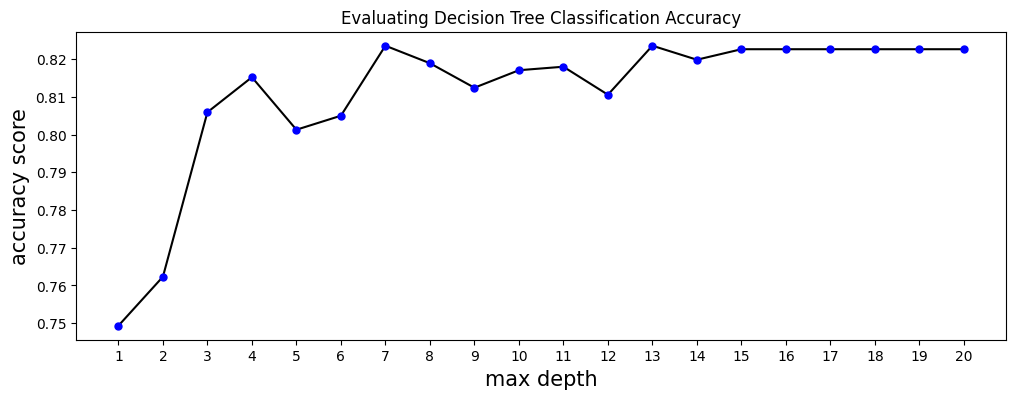

In [63]:
#ML 
#Decision tree model building and evaluation 
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf1 = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
  clf1.fit(X_train, y_train)
  y_pred1 = clf1.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred1))
     

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 4)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
ax.title.set_text('Evaluating Decision Tree Classification Accuracy')
plt.xticks(depths)
plt.show()

In [66]:
#ML
#### !!!!!!!! Need to apply optimal max depth
clf1 = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred1))
print(metrics.accuracy_score(y_train, clf1.predict(X_train)))

0.8235840297121634
0.9638278388278388


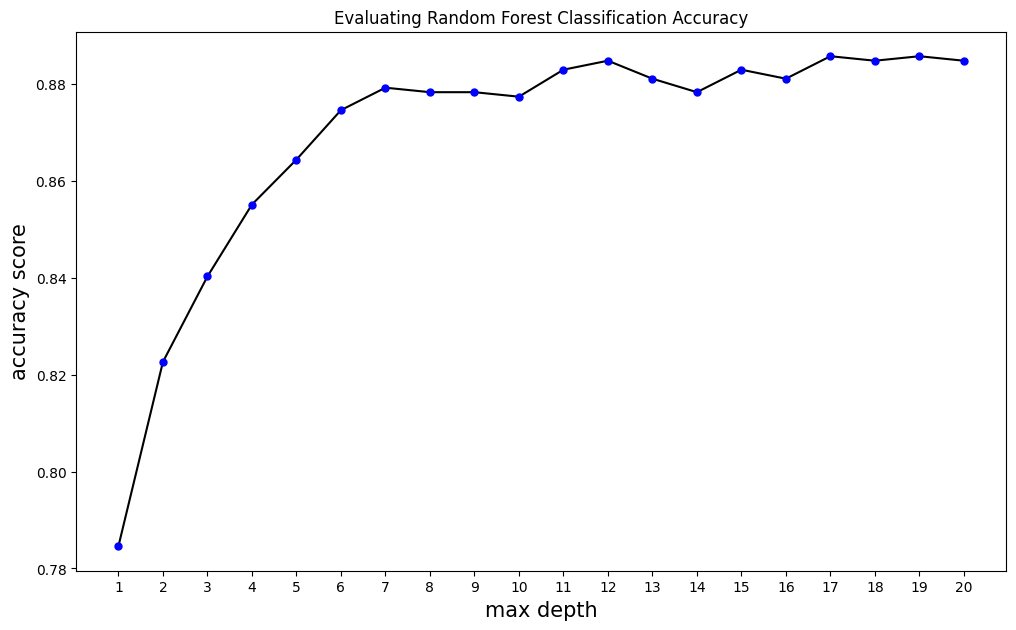

In [67]:
#ML
#Random Forest model building and evaluation
depths = [i for i in range(1, 20+1)]
accuracies = []

for depth in depths:
  clf2 = RandomForestClassifier(max_depth=depth, random_state=42)
  clf2.fit(X_train, y_train.values.ravel())
  y_pred2 = clf2.predict(X_test)
  accuracies.append(metrics.accuracy_score(y_test, y_pred2))
     

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 7)
ax.plot(depths, accuracies, '-', color="black", ms=10)
ax.plot(depths, accuracies, 'o', color="blue", ms=5)
ax.set_xlabel("max depth", size=15)
ax.set_ylabel("accuracy score", size=15)
ax.title.set_text('Evaluating Random Forest Classification Accuracy')
plt.xticks(depths)
plt.show()
     

In [70]:
# ML
#### !!!!!!!! Need to apply optimal max depth
clf2 = RandomForestClassifier(max_depth=12, random_state=42)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))
print(metrics.accuracy_score(y_train, clf2.predict(X_train)))

0.8848653667595172
0.9986263736263736


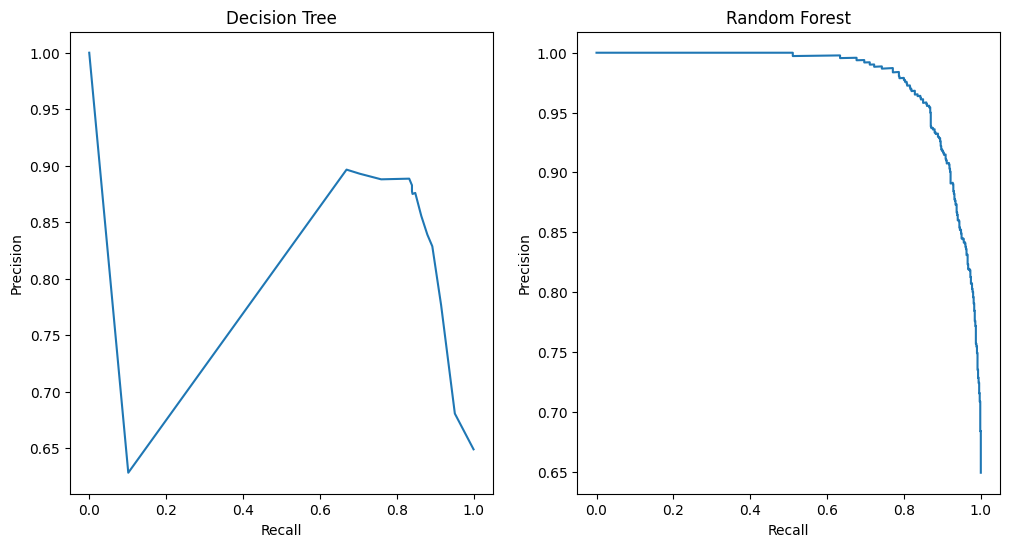

In [71]:
#ML
#Random Forest and Decision Tree PR curves

#generate curves
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, clf1.predict_proba(X_test)[:,0], pos_label="NPA")
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, clf2.predict_proba(X_test)[:,0], pos_label="NPA")

#plot
fig, ax = plt.subplots(1,2, figsize=(12, 6))

ax[0].plot(recall_1, precision_1)
ax[0].set_title("Decision Tree")
ax[1].plot(recall_2, precision_2)
ax[1].set_title("Random Forest")
ax[0].set_xlabel("Recall")
ax[0].set_ylabel("Precision")
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")

plt.show()